# **1** Anonimizar archivo

las siguientes celdas van a estar comentadas para que pueda 'ejecutar todo', sin tener que preocuparse de esto, pero no las borro por si tengo que corregir mas adelante o por si se utilizan para otro archivo (de texto exportado de un grupo de WhatsApp)

In [ ]:
#%pip install Faker

In [ ]:
""" import re
names = set()
input_file = "data/WhatsApp chat.txt"
output_file = "data/AnonymChat.txt"
with open(input_file,encoding='utf-8') as f:
    #print(f.read())
    #for i in range(10):
    for i in f:
        text=i
        match = re.search(r"\d{2}/\d{2}/\d{2}, \d{2}:\d{2} - (.*?):", text)
        #print(text)
        if match:
            name = match.group(1)
            names.add(name)
names """

In [ ]:
""" from faker import Faker
fake = Faker('ja_JP') #para generar nombres aleatorios (falsos) en japones (katanaka)
anonym_map = {}
for nombre in names:
    anonym_map[nombre]=fake.kana_name()

anonym_map """

In [ ]:
""" with open(input_file, 'r', encoding='utf-8') as infile, \
         open(output_file, 'w', encoding='utf-8') as outfile:
        
        for line in infile:
            if (not re.search(r":.*@[\S]+", line)) and re.search(r"\d{2}/\d{2}/\d{2}, \d{2}:\d{2} - (.*?):", line): #para quitar las menciones "@fulanito" y las lineas sueltas (que son mas dificiles de verificar, en mi caso particular)
                for real_name, anon_name in anonym_map.items():
                    line = line.replace(real_name, anon_name)
                outfile.write(line) """

# **2** Ingesta y limpieza de datos

In [42]:
import re
import pandas as pd
output_file = "data/AnonymChat.txt"
fechas = []
usuarios = []
mensajes = []
media = []
with open(output_file,encoding='utf-8') as f:
    #print(f.read())
    """ for i in range(10):
        print(f.readline().split(" - ")[0])
        print(f.readline().split(" - ")[1].split(":")[0])
        print(f.readline().split(" - ")[1].split(":")[1].strip() )
        print(f.readline().split(" - ")[1].split(":")[1].strip() =="<Media omitted>") """
    for i in f:
        if ' - ' in i:
            fechas.append(i.split(" - ")[0])
            usuarios.append(i.split(" - ")[1].split(":")[0])
            if i.split(" - ")[1].split(":")[1].strip() =="<Media omitted>":
                mensajes.append(None)
                media.append(True)
            else:
                mensajes.append(i.split(" - ")[1].split(":")[1].strip())
                media.append(False)
df = pd.DataFrame(data={'fecha':fechas,'usuario':usuarios,'mensaje':mensajes,'isMedia':media})
df['fecha']=pd.to_datetime(df['fecha'])
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25660\831975826.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha']=pd.to_datetime(df['fecha'])


,fecha,usuario,mensaje,isMedia
0,2023-05-23 22:26:00,ヤマダ カナ,None,True
1,2023-05-23 22:26:00,ヤマダ カナ,None,True
2,2023-05-23 22:40:00,ヤマダ カオリ,Jajaja,False
3,2023-05-23 22:40:00,オオタ レイ,Libros que pueden gustarles a los 3 nuevos,False
4,2023-05-23 22:41:00,ヤマダ カオリ,Los extrañé,False


In [43]:
df['palabras'] = df['mensaje'].str.count(' ')+1
df.head()

,fecha,usuario,mensaje,isMedia,palabras
0,2023-05-23 22:26:00,ヤマダ カナ,None,True,NaN
1,2023-05-23 22:26:00,ヤマダ カナ,None,True,NaN
2,2023-05-23 22:40:00,ヤマダ カオリ,Jajaja,False,1.0
3,2023-05-23 22:40:00,オオタ レイ,Libros que pueden gustarles a los 3 nuevos,False,8.0
4,2023-05-23 22:41:00,ヤマダ カオリ,Los extrañé,False,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11885 entries, 0 to 11884
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     11885 non-null  datetime64[ns]
 1   usuario   11885 non-null  object        
 2   mensaje   8376 non-null   object        
 3   isMedia   11885 non-null  bool          
 4   palabras  8376 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 383.1+ KB


In [103]:
df.describe(include='all')

,fecha,usuario,mensaje,isMedia,palabras
count,11885,11885,8376,11885,8376.000000
unique,NaN,49,7139,2,NaN
top,NaN,タナカ アケミ,https,False,NaN
freq,NaN,2848,167,8376,NaN
mean,2024-06-22 06:18:33.844341504,NaN,NaN,NaN,6.337034
min,2023-01-06 12:13:00,NaN,NaN,NaN,1.000000
25%,2023-10-23 10:46:00,NaN,NaN,NaN,2.000000
50%,2024-06-21 07:46:00,NaN,NaN,NaN,4.000000
75%,2025-03-15 18:01:00,NaN,NaN,NaN,8.000000
max,2025-12-09 14:39:00,NaN,NaN,NaN,197.000000


Tambien se podrian ver 
- las menciones (en el mensaje de otros usuarios)
- el usuario que mando el mensaje anterior (para hacer una cadena de markov)
- si el mensaje contiene un link web (la columna cambiaria a tipo de categorias)

# **3** Análisis exploratorio de datos

## Promedio de mensajes

Que tantos mensajes se enviaron?

In [5]:
total_mensajes = len(df)
total_mensajes

11885

que tantos por persona?

In [10]:
total_usuarios = len(df['usuario'].unique())
total_usuarios

49

In [16]:
mensajes_promedio_usuario = total_mensajes/total_usuarios
round(mensajes_promedio_usuario,2)

242.55

que tantos por dia?

In [15]:
rango_fechas = df['fecha'].max() - df['fecha'].min()
rango_fechas.days

1068

In [18]:
mensajes_promedio_dia = total_mensajes / rango_fechas.days
round(mensajes_promedio_dia,2)

11.13

que tantos envia cada usuario por semana?

In [22]:
mensajes_promedio_usuario_semana = total_mensajes/(rango_fechas.days/7 * total_usuarios)
round(mensajes_promedio_usuario_semana,2)

1.59

## Nube de palabras

In [ ]:
""" %pip install spacy
%pip install wordcloud """

In [ ]:
#!python -m spacy download de_core_news_sm

In [ ]:
regex_esp = r'([a-zA-Zá-ü\s]+)' #para exluir otros caracteres que no esten en el español normal
texto = ' '.join(df['mensaje'].dropna().str.lower().str.extract(regex_esp, expand=False).dropna().to_list())
len(texto)

175060

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

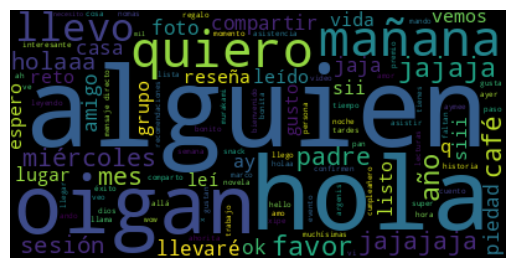

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
nlp = spacy.load('es_core_news_md')
plt.style.use('ggplot')

palabras_paro = nlp.Defaults.stop_words
palabras_paro.update([
  "http",'https',#vinculos
  'This','message','was','deleted','edited','This message',#cuando borran mensajes
  'libro','leer','libros','club','lectura',#no es sorpresa en un circulo de lectura
  'confirmo',#hacemos pase de lista
  'Gracias','feliz','cumpleaños','cumple','felicidades',#parece que somos muy agradecidos
])
wc = WordCloud(stopwords=palabras_paro).generate(texto)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Frecuencia de mensajes

In [ ]:
%pip install seaborn

In [107]:
df['isMedia'] = df['isMedia'].astype(int)
df['isMedia'].describe()

count    11885.000000
mean         0.295246
std          0.456173
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: isMedia, dtype: float64

por usuario

<Axes: title={'center': 'Mensajes por usuario'}, xlabel='Usuarios', ylabel='Mensajes'>

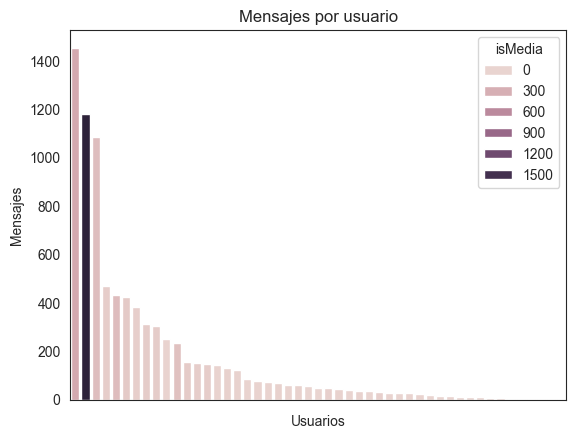

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

mensajes_por_usuario = df[['mensaje','isMedia']].groupby(df.usuario).agg({'mensaje':'count','isMedia':'sum'}).sort_values('mensaje',ascending=False).reset_index()
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])
plt.xlabel( "Usuarios" )
plt.ylabel( "Mensajes" )
plt.title('Mensajes por usuario')
sns.barplot(data=mensajes_por_usuario,x=mensajes_por_usuario.index,y='mensaje',hue='isMedia')

por hora

<Axes: title={'center': 'Mensajes por hora'}, xlabel='Hora', ylabel='Mensajes'>

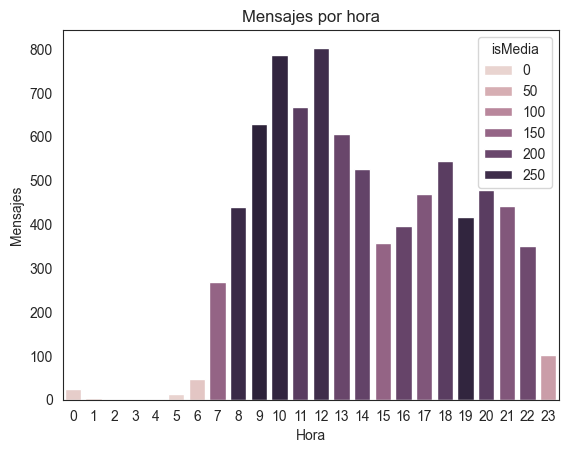

In [134]:
mensajes_por_hora = df[['mensaje','isMedia']].groupby(df.fecha.dt.hour).agg({'mensaje':'count','isMedia':'sum'}).reset_index(drop=True)
plt.xlabel( "Hora" )
plt.ylabel( "Mensajes" )
plt.title('Mensajes por hora')
sns.barplot(data=mensajes_por_hora,x=mensajes_por_hora.index,y='mensaje',hue='isMedia')

por dia de la semana

C:\Users\DELL\AppData\Local\Temp\ipykernel_16448\3339292675.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['L','M','M','J','V','S','S'])


<Axes: title={'center': 'Mensajes por dia de la semana'}, xlabel='Dia', ylabel='Mensajes'>

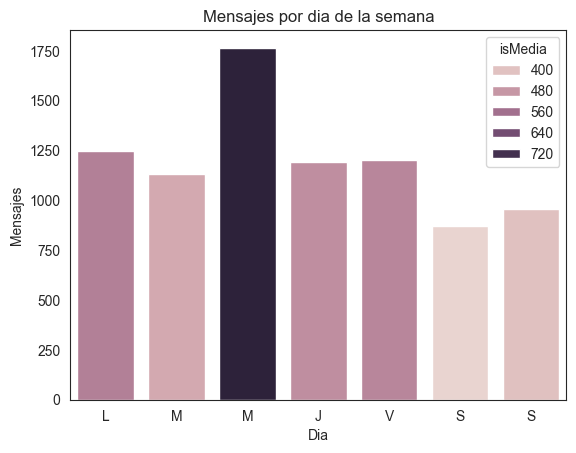

In [135]:
mensajes_por_dia = df[['mensaje','isMedia']].groupby(df.fecha.dt.weekday).agg({'mensaje':'count','isMedia':'sum'}).reset_index(drop=True)
plt.gca().set_xticklabels(['L','M','M','J','V','S','S'])
plt.xlabel( "Dia" )
plt.ylabel( "Mensajes" )
plt.title('Mensajes por dia de la semana')
sns.barplot(data=mensajes_por_dia,x=mensajes_por_dia.index,y='mensaje',hue='isMedia')

por tipo de mensaje (de texto o imagenes/stickers)

In [104]:
df.groupby('isMedia').count()['fecha']

isMedia
False    8376
True     3509
Name: fecha, dtype: int64

# **4** Otros análisis